<h2>Finding Mineral Resources in the United States</h2>

### Notebook authored by Daniel Helton
### December 15-20, 2020
### Data sourced from [Mineral Resources Data System](https://mrdata.usgs.gov/mrds/)

##### This project searches for areas in the United States that specifically produce or handle certain kinds of minerals.
##### It combines two different kinds of data over the course of three iterations to generate a useful file.

### Importing and Preparing Data
##### To begin, we call the MDRS's shapefile of resource locations and a basic state outline shapefile.

In [35]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 12)

In [36]:
minerals = gpd.read_file('https://mrdata.usgs.gov/mrds/mrds-trim.zip')
us_states = gpd.read_file('http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_state_20m.zip')

##### We search for resource areas specializaing in silver within the data. We isolate it and convert it to a new JSON.

In [37]:
silver = minerals.loc[minerals['CODE_LIST'] == 'AG']
with open('data/silver.json', 'w') as f:
    f.write(silver.to_json())
silver = gpd.read_file('data/silver.json')

##### The new JSON is compared against the state file to produce a US-specific, silver-oriented JSON.
##### The process is repeated with gold.

In [38]:
states_poly = us_states.geometry.unary_union
us_silver = silver[silver.geometry.intersects(states_poly)]

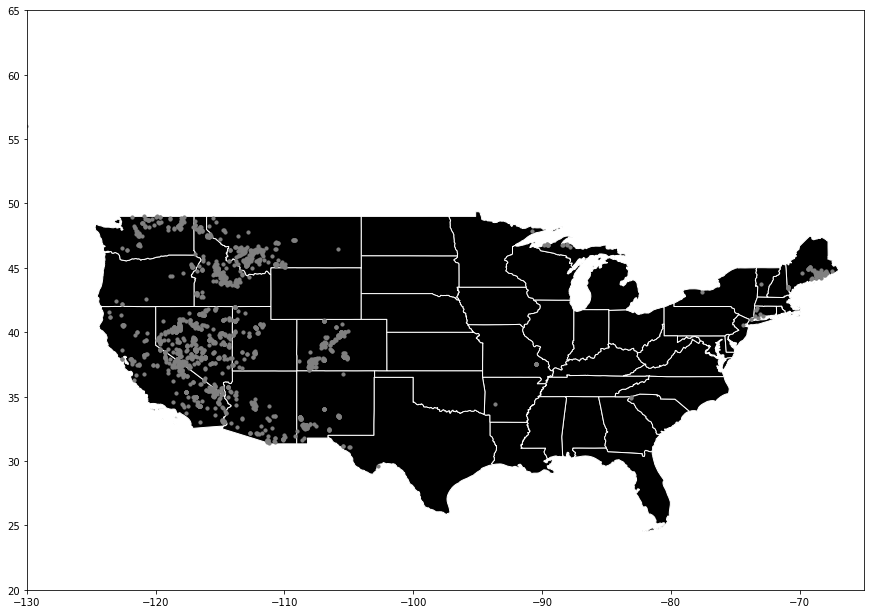

In [39]:
fig, ax = plt.subplots()

us_states.plot(ax=ax, edgecolor='white', color='black')
us_silver.plot(ax=ax, color='gray', markersize=10, zorder=1);

ax.set(xlim=(-130,-65), ylim=(20,65));

In [40]:
gold = minerals.loc[minerals['CODE_LIST'] == 'AU']
with open('data/gold.json', 'w') as f:
    f.write(gold.to_json())
gold = gpd.read_file('data/gold.json')

us_gold = gold[gold.geometry.intersects(states_poly)]

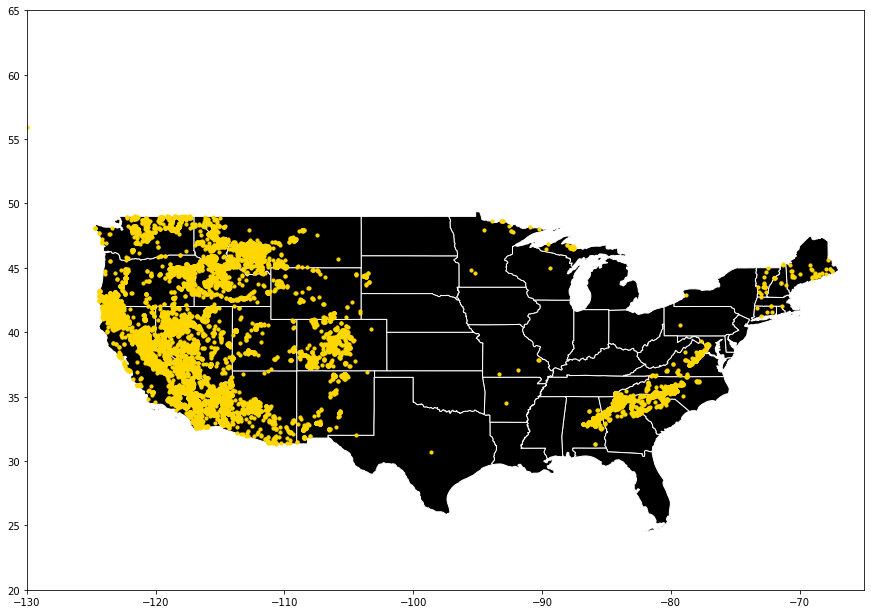

In [41]:
fig, ax = plt.subplots()

us_states.plot(ax=ax, edgecolor='white', color='black')
us_gold.plot(ax=ax, color='#FFD700', markersize=10, zorder=1);

ax.set(xlim=(-130,-65), ylim=(20,65));

### Finalizing and Affirming Data
##### Unnecessary data in the files are dropped. A final map is produced to estimate what the product will look like at completion.

In [42]:
us_gold = us_gold.drop(columns=['id', 'DEP_ID', 'DEV_STAT', 'URL']) # only mineral type, location name, and geometry retained
us_silver = us_silver.drop(columns=['id', 'DEP_ID', 'DEV_STAT', 'URL'])

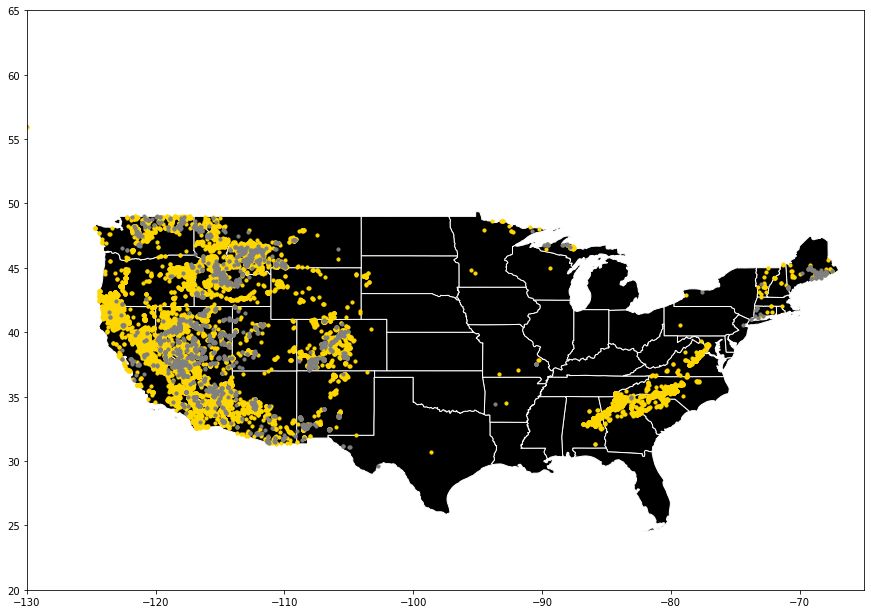

In [43]:
fig, ax = plt.subplots()

us_states.plot(ax=ax, edgecolor='white', color='black')
us_silver.plot(ax=ax, color='gray', markersize=10, zorder=2);
us_gold.plot(ax=ax, color='#FFD700', markersize=10, zorder=1)

ax.set(xlim=(-130,-65), ylim=(20,65));

##### The new data is written to JSON files that are ready to use in a web map.

In [61]:
with open('../map/data/us_silver.json', 'w') as f:
    f.write(us_silver.to_json())

In [52]:
with open('../map/data/us_gold.json', 'w') as f:
    f.write(us_gold.to_json())

In [50]:
with open('../map/data/us_states.json', 'w') as f:
    f.write(us_states.to_json())